In [1]:
import matplotlib.pyplot as plt
import numpy as np
from eigenface.yalefaces import YaleFaceDb
np.set_printoptions(precision=2, suppress=True, formatter={'float': '{: 0.2f}'.format}, linewidth=1000)

In [2]:
db = YaleFaceDb()

def gen_images():
    images = np.empty(shape=(3,4,4))
    images[0,:,:] = np.array([[1,2,3,4],[5,6,7,8],[5,6,7,8],[5,6,7,8]])
    images[1,:,:] = np.array([[2,3,4,5],[6,7,8,9],[5,6,7,8],[5,6,7,8]])
    images[2,:,:] = np.array([[0,2,4,6],[3,5,7,9],[5,6,7,8],[5,6,7,8]])
    return images
# images = gen_images().astype(dtype=np.float)
images = db.get_list().astype(dtype=np.float)
labels = db.get_label()
print(images[:,:,:,0])
images.shape

[[[ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  ..., 
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]]

 [[ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  ..., 
  [ 255.00  255.00  255.00 ...,  254.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  253.00  240.00  240.00]
  [ 255.00  255.00  255.00 ...,  255.00  254.00  252.00]]

 [[ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
  ..., 
  [ 255.00  255.00  254.00 ...,  247.00  250.00  255.00]
  [ 255.00  255.00  255.00 ...,  243.00  242.00  254.00]
  [

(165, 100, 100, 1)

In [3]:
# M traiing images with width NxN
# ==> np.array with N^2 row (number of pixels), M column (number of images)
def convert_matrix_presentation(images): 
    vector2d = []
    for image in images:
        vector = image.flatten()
        vector2d.append(vector)
    return np.array(vector2d)

def test_matrix_presentation():
    return convert_matrix_presentation(images)
vector_matrix = test_matrix_presentation()
print(vector_matrix)
print(vector_matrix.shape)

[[ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]
 [ 255.00  255.00  255.00 ...,  255.00  254.00  252.00]
 [ 255.00  255.00  255.00 ...,  255.00  255.00  252.00]
 ..., 
 [ 255.00  255.00  255.00 ...,  27.00  40.00  101.00]
 [ 255.00  255.00  255.00 ...,  139.00  222.00  223.00]
 [ 255.00  255.00  255.00 ...,  255.00  255.00  255.00]]
(165, 10000)


In [4]:
mean_vector = vector_matrix.mean(axis=0)
print(mean_vector)
print(mean_vector.shape)

[ 248.67  248.90  248.86 ...,  209.83  212.42  214.73]
(10000,)


In [5]:
vector_mean_matrix = vector_matrix[:,:] - mean_vector
print(vector_mean_matrix)    

[[ 6.33  6.10  6.14 ...,  45.17  42.58  40.27]
 [ 6.33  6.10  6.14 ...,  45.17  41.58  37.27]
 [ 6.33  6.10  6.14 ...,  45.17  42.58  37.27]
 ..., 
 [ 6.33  6.10  6.14 ..., -182.83 -172.42 -113.73]
 [ 6.33  6.10  6.14 ..., -70.83  9.58  8.27]
 [ 6.33  6.10  6.14 ...,  45.17  42.58  40.27]]


In [6]:
covariance_matrix = np.matmul(vector_mean_matrix,vector_mean_matrix.T) # vector_matrix: [M x N^2], [N^2 x M]
print(covariance_matrix.shape)
print(covariance_matrix)

(165, 165)
[[ 29355065.79  8846414.05  9457439.14 ...,  581126.85  2089275.27  566094.10]
 [ 8846414.05  25373990.32  20047641.41 ..., -2797640.88 -3135223.47 -2588681.63]
 [ 9457439.14  20047641.41  25803591.49 ..., -847127.80  72573.62 -918147.55]
 ..., 
 [ 581126.85 -2797640.88 -847127.80 ...,  42143862.91  32331982.33  21220256.16]
 [ 2089275.27 -3135223.47  72573.62 ...,  32331982.33  37888239.75  16034989.58]
 [ 566094.10 -2588681.63 -918147.55 ...,  21220256.16  16034989.58  32993349.42]]


In [7]:
u, eigen_value, eigen_vector_vi = np.linalg.svd(covariance_matrix)
print("u:", u.shape, "\n", u)
print("eigen_value:\n", eigen_value)
print("eigen_vector_vi: ", eigen_vector_vi.shape, "\n", eigen_vector_vi)

u: (165, 165) 
 [[-0.06 -0.04  0.02 ...,  0.00  0.00 -0.08]
 [ 0.03  0.05  0.02 ...,  0.00  0.00 -0.08]
 [ 0.03  0.03  0.00 ...,  0.00  0.00 -0.08]
 ..., 
 [ 0.04 -0.07  0.08 ...,  0.00  0.00 -0.08]
 [ 0.04 -0.07  0.04 ...,  0.00  0.00 -0.08]
 [ 0.05 -0.09  0.11 ...,  0.00  0.00 -0.08]]
eigen_value:
 [ 1074499909.05  973989965.73  693086965.82  399710027.64  386363173.15  302872688.11  209279720.03  175909285.61  165649976.23  149171665.13  106904267.45  90754574.39  87866296.75  71088229.54  68655806.82  60034178.42  54869315.64  50539741.98  46887487.60  42990051.59  39717196.34  35311270.39  34133329.77  31080906.45  30053068.74  26726897.74  25294861.75  24505229.78  22983859.95  21034703.55  19470256.57  19191522.73  18552881.48  18266870.14  17730969.39  15954557.10  15873291.93  15292365.51  14847125.08  14079771.34  13603773.02  12983509.38  12736208.04  12402508.39  12011170.10  11569833.06  11232281.16  10834015.43  10563322.85  10248733.54  9920553.08  9650929.96  9474144.34

In [8]:
# Check Covar.x = r.x
print('Check Eigen Properties Wx = rx:')
print('Wx:', np.matmul(covariance_matrix, eigen_vector_vi[0,:]))
print('rx:', eigen_value[0] * eigen_vector_vi[0,:])

Check Eigen Properties Wx = rx:
Wx: [-62514077.58  29641461.92  33867343.71 -195682964.92  43701962.63  27569130.16 -49524581.98  46677629.70  26007928.31  37894725.74 -5700232.67  70409807.06 -405493.47  6219390.71 -128921566.32  9095260.17  11468947.84  45136516.92  2176159.12  13484645.40  14549411.65 -27660545.50 -12868614.17  58846301.50  49812362.74 -169446549.04  59180043.20  55128791.78 -27837926.01  45226118.68  43526498.93  64011775.56 -293730.66  35448190.47  38463314.22  36698934.64 -145113586.84  26380499.95  23939644.89 -42689393.73  25561252.15  36819060.83  16014905.84 -643637.58  27318710.57  75315571.95  68850246.66 -118920956.29  71931269.47  73016566.02 -23353234.10  60918624.13  59997146.90  75798507.33  68805967.01 -56624271.99 -77832838.66 -40495890.81 -173440394.13 -47804314.13 -47804314.13 -54907167.78 -61942895.68 -62980979.45 -67161044.10 -73552633.18  34289370.25  84626778.05  93046997.69 -165200708.85  64191878.75  64191878.75  8631089.23  83970841.97  7312

In [9]:
eigen_vector_u0 = np.matmul(vector_mean_matrix.T, eigen_vector_vi[0,:])
print(eigen_vector_u0)

[ 2.67 -1.35 -1.73 ...,  415.28  397.83  415.44]


In [10]:
eigen_vector_ui = np.matmul(vector_mean_matrix.T, eigen_vector_vi[:,:].T).T
print(eigen_vector_ui)

[[ 2.67 -1.35 -1.73 ...,  415.28  397.83  415.44]
 [ 53.18  50.94  51.45 ..., -276.83 -274.72 -262.91]
 [ 108.12  106.08  102.10 ..., -71.50 -81.29 -65.64]
 ..., 
 [ 0.00  0.00  0.00 ..., -0.00 -0.00  0.00]
 [ 0.00  0.00  0.00 ..., -0.00 -0.00 -0.00]
 [-0.00 -0.00 -0.00 ..., -0.00 -0.00 -0.00]]


In [11]:
print('Check Eigen Properties Wx = rx:')
print('Wx:', np.matmul(np.matmul(vector_mean_matrix.T,vector_mean_matrix), eigen_vector_ui[0,:]))
print('rx:', eigen_value[0] * eigen_vector_ui[0,:])

Check Eigen Properties Wx = rx:
Wx: [ 2869581037.27 -1448751383.92 -1861773809.08 ...,  446218945567.74  427472261589.23  446387845044.23]
rx: [ 2869581037.27 -1448751383.92 -1861773809.08 ...,  446218945567.74  427472261589.22  446387845044.23]


In [12]:
norms = np.linalg.norm(eigen_vector_ui, axis=1)
print(norms)

[ 32779.57  31208.81  26326.54  19992.75  19656.12  17403.24  14466.50  13263.08  12870.51  12213.59  10339.45  9526.52  9373.70  8431.38  8285.88  7748.17  7407.38  7109.13  6847.44  6556.68  6302.16  5942.33  5842.37  5575.03  5482.07  5169.81  5029.40  4950.28  4794.15  4586.36  4412.51  4380.81  4307.31  4273.98  4210.82  3994.32  3984.13  3910.55  3853.20  3752.30  3688.33  3603.26  3568.78  3521.72  3465.71  3401.45  3351.46  3291.51  3250.13  3201.36  3149.69  3106.59  3078.01  3058.29  2981.33  2970.77  2939.91  2876.61  2850.40  2845.14  2807.08  2780.06  2727.97  2695.42  2669.89  2624.99  2600.63  2584.89  2572.34  2507.55  2473.64  2447.87  2434.59  2418.44  2378.56  2357.98  2350.70  2304.43  2271.41  2254.92  2222.65  2185.43  2165.92  2148.60  2125.74  2110.77  2082.99  2077.06  2048.59  2030.03  2003.29  1985.52  1981.88  1967.96  1959.10  1941.19  1916.12  1893.25  1874.42  1851.44  1837.30  1820.03  1808.09  1787.33  1771.51  1758.93  1729.46  1702.46  1683.56
  1675.

In [13]:
norm_ui = np.divide(eigen_vector_ui.T, norms).T
print(norm_ui)
(norm_ui[2]*norm_ui[2]).sum()

[[ 0.00 -0.00 -0.00 ...,  0.01  0.01  0.01]
 [ 0.00  0.00  0.00 ..., -0.01 -0.01 -0.01]
 [ 0.00  0.00  0.00 ..., -0.00 -0.00 -0.00]
 ..., 
 [ 0.01  0.01  0.01 ..., -0.00 -0.00  0.00]
 [ 0.00  0.00  0.00 ..., -0.01 -0.00 -0.01]
 [-0.02 -0.01 -0.01 ..., -0.00 -0.01 -0.01]]


1.0000000000000036

In [14]:
eigen_faces = norm_ui.reshape(images.shape)
print("Eigen Faces:\n", eigen_faces[:,:,:,0])

Eigen Faces:
 [[[ 0.00 -0.00 -0.00 ...,  0.00  0.00  0.00]
  [ 0.00  0.00  0.00 ...,  0.00  0.00  0.00]
  [ 0.00  0.00  0.00 ...,  0.00  0.00  0.00]
  ..., 
  [ 0.00  0.00  0.00 ...,  0.02  0.02  0.02]
  [ 0.00  0.00  0.00 ...,  0.01  0.01  0.01]
  [ 0.01  0.01  0.01 ...,  0.01  0.01  0.01]]

 [[ 0.00  0.00  0.00 ...,  0.00  0.00  0.00]
  [ 0.00  0.00  0.00 ...,  0.00  0.00  0.00]
  [ 0.00  0.00  0.00 ...,  0.00  0.00  0.00]
  ..., 
  [ 0.00  0.00  0.00 ..., -0.01 -0.01 -0.00]
  [ 0.00  0.00  0.00 ..., -0.01 -0.01 -0.01]
  [ 0.00  0.00  0.00 ..., -0.01 -0.01 -0.01]]

 [[ 0.00  0.00  0.00 ..., -0.00 -0.00 -0.00]
  [ 0.01  0.00  0.00 ..., -0.00 -0.00 -0.00]
  [ 0.01  0.01  0.01 ..., -0.00 -0.00 -0.00]
  ..., 
  [ 0.01  0.01  0.01 ..., -0.01 -0.01 -0.00]
  [ 0.01  0.01  0.01 ..., -0.00 -0.00 -0.00]
  [ 0.01  0.01  0.01 ..., -0.00 -0.00 -0.00]]

 ..., 
 [[ 0.01  0.01  0.01 ..., -0.01 -0.00 -0.00]
  [ 0.00  0.00  0.00 ..., -0.00 -0.00 -0.00]
  [ 0.01  0.01  0.01 ..., -0.00 -0.00 -0.00]
  ..

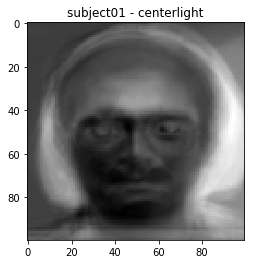

In [15]:
plt.imshow(eigen_faces[0,:,:,0].astype(dtype=np.float), cmap='gray')
plt.title('%s - %s'%(labels[0,0],labels[0,1]))
plt.show()

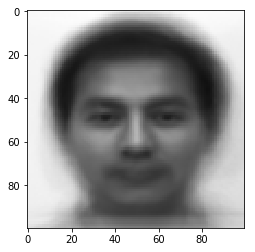

In [16]:
mean_image = (mean_vector).reshape(images.shape[1], images.shape[2]).astype(dtype=np.uint8)
plt.imshow(np.dstack([mean_image,mean_image,mean_image]))
plt.show()